In [15]:
# 验证截图数据

In [16]:
# 选择一张图片，在视频上验证

In [17]:
test_img = "./images/cam1_213_740_384_1185_1203.jpg"

In [18]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import glob

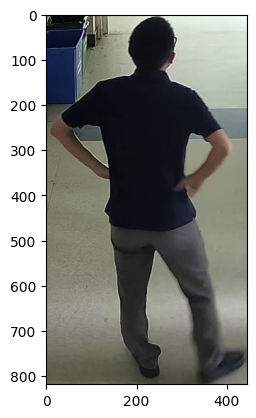

In [19]:
# display image
img = cv2.imread(test_img)
plt.imshow(img[:,:,::-1])

In [20]:
# 获取文件名中的参数
frame_id = int(test_img.split("_")[1])
# ltrb
l = int(test_img.split("_")[2])
t = int(test_img.split("_")[3])
r = int(test_img.split("_")[4])
b = int(test_img.split("_")[5].split(".")[0])

print("frame_id: ", frame_id)
print("{}, {}, {}, {}".format(l, t, r, b))

frame_id:  213
740, 384, 1185, 1203


In [21]:
# 读取视频，跳转到指定帧
cap = cv2.VideoCapture('./videos/cam1.mp4')
# total frames
total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
print(total_frames)
# jump to frame
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_id)
ret, frame = cap.read()



21720.0


(-0.5, 2559.5, 1439.5, -0.5)

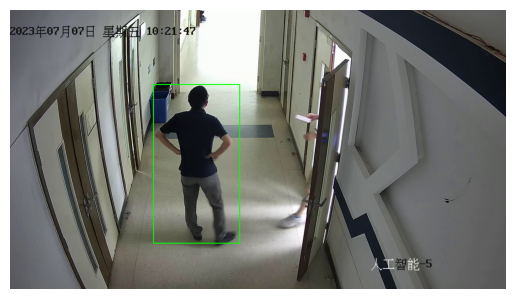

In [22]:
# display image
# draw rectangle
cv2.rectangle(frame, (l, t), (r, b), (0, 255, 0), 4)
plt.imshow(frame[:,:,::-1])
plt.axis('off')

In [23]:
# 测试一组图片，变成视频

In [24]:
img_list = glob.glob("./images/cam1*.jpg")

In [25]:
len(img_list)

30313

In [26]:
# 打乱顺序
np.random.shuffle(img_list)

In [27]:
img_list[:10]

['./images\\cam1_9261_1243_151_1453_776.jpg',
 './images\\cam1_3142_1211_342_1421_1136.jpg',
 './images\\cam1_7903_936_263_1192_1028.jpg',
 './images\\cam1_7307_960_263_1230_1030.jpg',
 './images\\cam1_7872_1235_246_1465_942.jpg',
 './images\\cam1_20454_959_331_1261_1194.jpg',
 './images\\cam1_4651_1162_3_1275_373.jpg',
 './images\\cam1_4615_1107_1_1206_383.jpg',
 './images\\cam1_1199_964_66_1146_536.jpg',
 './images\\cam1_4162_1110_36_1258_540.jpg']

In [28]:
# 根据frame_id排序
img_list.sort(key=lambda x: int(x.split("_")[1]))

In [29]:
img_list

['./images\\cam1_170_1456_355_1619_1111.jpg',
 './images\\cam1_171_1439_362_1606_1187.jpg',
 './images\\cam1_171_1365_349_1608_1182.jpg',
 './images\\cam1_172_1362_345_1601_1180.jpg',
 './images\\cam1_173_1357_353_1599_1183.jpg',
 './images\\cam1_174_1351_360_1598_1184.jpg',
 './images\\cam1_175_1349_358_1597_1183.jpg',
 './images\\cam1_176_1344_361_1594_1181.jpg',
 './images\\cam1_177_1346_367_1584_1197.jpg',
 './images\\cam1_178_1348_360_1581_1183.jpg',
 './images\\cam1_179_1342_369_1576_1184.jpg',
 './images\\cam1_180_1327_369_1573_1184.jpg',
 './images\\cam1_181_1311_369_1570_1182.jpg',
 './images\\cam1_182_1291_372_1535_1183.jpg',
 './images\\cam1_183_1277_376_1511_1198.jpg',
 './images\\cam1_184_1223_378_1499_1181.jpg',
 './images\\cam1_185_1147_377_1495_1177.jpg',
 './images\\cam1_186_1148_377_1495_1174.jpg',
 './images\\cam1_187_1149_380_1482_1165.jpg',
 './images\\cam1_188_1149_380_1465_1160.jpg',
 './images\\cam1_189_1146_375_1450_1156.jpg',
 './images\\cam1_190_1145_375_1406

In [31]:
# 测试一组图片，变成视频
# 读取视频，跳转到指定帧
cap = cv2.VideoCapture('./videos/cam1.mp4')
# total frames
total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
w,h = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(total_frames)

for frame in img_list:
    frame_id = int(frame.split("_")[1])
    # ltrb
    l = int(frame.split("_")[2])
    t = int(frame.split("_")[3])
    r = int(frame.split("_")[4])
    b = int(frame.split("_")[5].split(".")[0])
    # jump to frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_id)
    ret, frame = cap.read()
    # draw rectangle
    cv2.rectangle(frame, (l, t), (r, b), (0, 255, 0), 4)
    # draw frame id
    cv2.putText(frame, str(frame_id), (100, 100), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 2)
    # resize to half
    frame = cv2.resize(frame, (w//2, h//2))
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# release
cap.release()
cv2.destroyAllWindows()



21720.0
